# Multimodal multivariate Gaussian

We can create a multimodal multivariate gaussian using [MultimodalNormalLogPDF](http://pints.readthedocs.io/en/latest/toy/multimodal_normal_logpdf.html). By default, this has the distribution

$$ p(\boldsymbol{x}) \propto \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_1, \boldsymbol{\Sigma}_1\right) + \mathcal{N}\left(\boldsymbol{x}\;\lvert\;\boldsymbol{\mu}_2, \boldsymbol{\Sigma}_2\right),$$

where, $\boldsymbol{\mu}_1 = (0,0)$ and $\boldsymbol{\mu}_2 = (10,10)$ and $\boldsymbol{\Sigma}_1$ and $\boldsymbol{\Sigma}_2$ are diagonal correlation matrices.

Plotting this pdf:

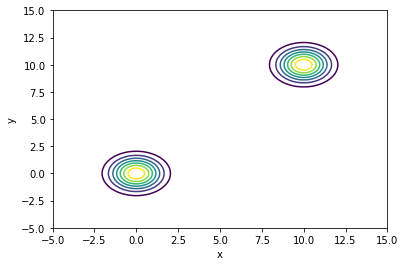

In [1]:
import os
os.chdir("..")
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.MultimodalNormalLogPDF()

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Use adaptive covariance MCMC to sample from this (un-normalised) pdf.

In [2]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


Scatter plot of the samples. Adaptive covariance MCMC does ok if we start the chains between the modes.

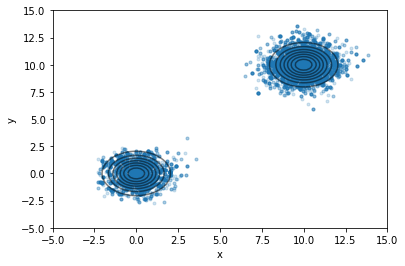

In [3]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

But if we start the chains at one of the modes, it can fail to find the other:

In [4]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([-0.1, -0.1], [0.1, 0.1], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]

Running...
Done!


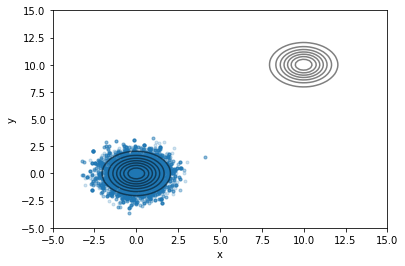

In [5]:
stacked = np.vstack(chains)
plt.contour(X, Y, Z, colors ='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha = 0.2)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Other mode configurations
This distribution can also be used to generate modes in other configurations and other dimensions. For example, we can generate three modes in two dimensions then independently sample from them.

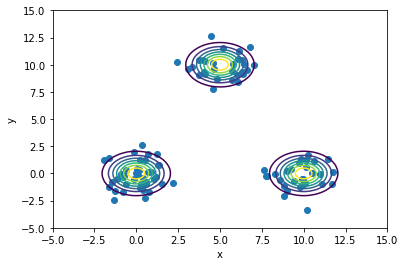

In [10]:
log_pdf = pints.toy.MultimodalNormalLogPDF(modes=[[0, 0], [5, 10], [10, 0]])

samples = log_pdf.sample(100)

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.scatter(samples[:,0], samples[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Or specify different covariance matrices for each mode.

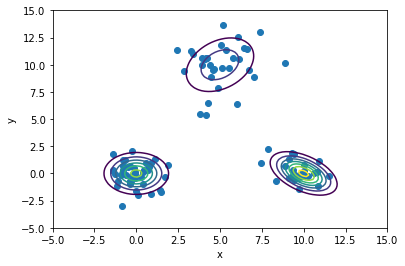

In [28]:
covariances = [[[1, 0], [0, 1]],
               [[2, 0.8], [0.8, 3]],
               [[1, -0.5], [-0.5, 1]]]
log_pdf = pints.toy.MultimodalNormalLogPDF(modes=[[0, 0], [5, 10], [10, 0]], covariances=covariances)

samples = log_pdf.sample(100)

# Contour plot of pdf
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.scatter(samples[:,0], samples[:,1])
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Or make a multimodal distribution in one dimension.

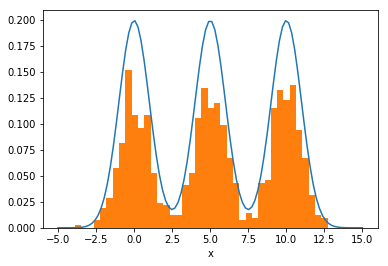

In [36]:
log_pdf = pints.toy.MultimodalNormalLogPDF(modes=[[0], [5], [10]])
x = np.linspace(-5, 15, num_points)
prob = np.exp([log_pdf([i]) for i in x])
samples = log_pdf.sample(1000)
plt.plot(x, prob / 2)
plt.hist(samples, 40, density=True)
plt.xlabel('x')
plt.show()

Or a multimodal distribution in  5 dimensions (plotting the first two dimensions only).

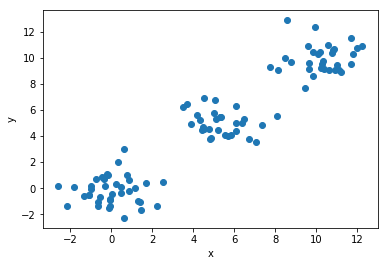

In [43]:
log_pdf = pints.toy.MultimodalNormalLogPDF(modes=[np.repeat(0, 5), np.repeat(5, 5), np.repeat(10, 5)])

samples = log_pdf.sample(100)
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now use Hamiltonian Monte Carlo to sample from this distribution.

In [ ]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform([2, 2], [8, 8], size=(4, 2))
mcmc = pints.MCMCSampling(log_pdf, 4, x0, method=pints.AdaptiveCovarianceMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(4000)

# Disable logging
mcmc.set_log_to_screen(False)

# Number of chains
num_chains = 4

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Discard warm-up
chains = [chain[1000:] for chain in chains]